In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sns.set_style('white')

In [4]:
column_name = ['user_id', 'item_id', 'rating', 'timestamp']

In [5]:
df = pd.read_csv('u.data', sep='\t', names=column_name)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
movie_title = pd.read_csv('Movie_Id_Titles')

In [9]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
movie_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [11]:
df_concat = pd.merge(df, movie_title, on='item_id')

In [12]:
df_concat.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [13]:
df_concat.groupby('title')['rating'].mean().nunique()

896

In [14]:
# Filmes com maior média de classificação
df_concat.groupby('title')['rating'].mean().sort_values(ascending=False).head(10) 

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [15]:
# Filmes mais vistos
df_concat.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

**Agora iremos criar um DataFrame apenas com as médias de classificação e as contagens, iremos fazer um agrupamento**

In [16]:
ratings = pd.DataFrame(df_concat.groupby('title')['rating'].mean())

In [17]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [18]:
ratings['count'] = pd.DataFrame(df_concat.groupby('title')['rating'].count())

In [19]:
ratings.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [20]:
ratings.shape

(1664, 2)

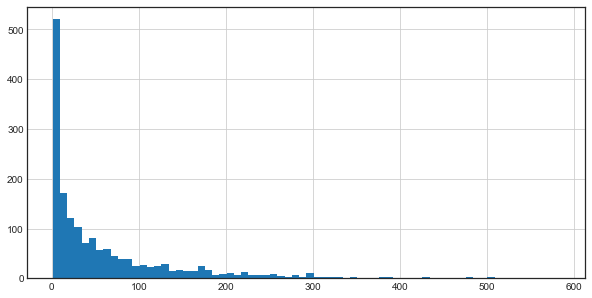

In [21]:
plt.figure(figsize=(10, 5))
ratings['count'].hist(bins=70)

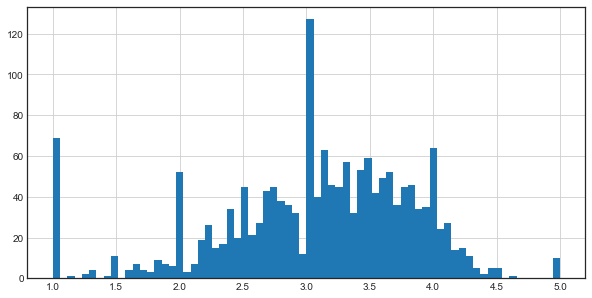

In [22]:
plt.figure(figsize=(10, 5))
ratings['rating'].hist(bins=70)
# Algumas barras estão com picos, provavelmente é pq assistiram o filme apenas 1 vez

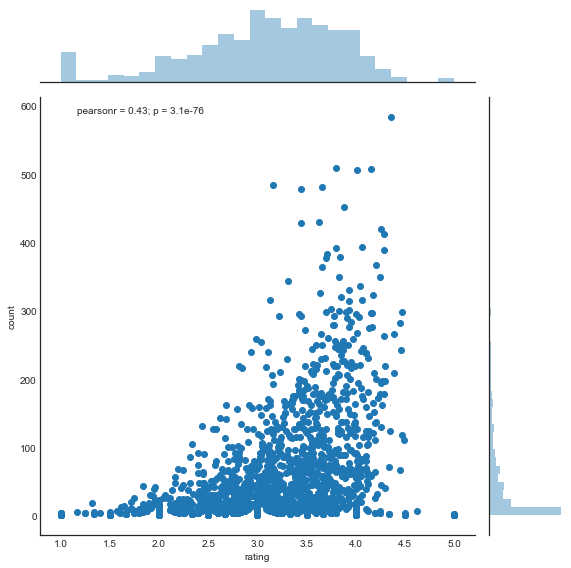

In [23]:
# Tem um aumenta na contagem e na média
sns.jointplot(x='rating', y='count', data=ratings, size=8)

In [25]:
moviemat = df_concat.pivot_table(values='rating', index='user_id', columns='title')

In [27]:
moviemat.shape

(944, 1664)

In [28]:
ratings.sort_values('count', ascending=False).head()

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [29]:
starwars_user_ratings = moviemat['Star Wars (1977)']

In [31]:
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [34]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\Users\Igo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Igo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [35]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [36]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\Igo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Igo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [37]:
similar_to_liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

### Correlações de outros filmes com o Star Wars

In [38]:
corr_starwars = pd.DataFrame(similiar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [39]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [41]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


In [43]:
corr_starwars = corr_starwars.join(ratings['count'])

In [44]:
corr_starwars.head()

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [48]:
corr_starwars[corr_starwars['count']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


### Correlações de outros filmes com o Liar Liar

In [58]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])

In [60]:
corr_liarliar.dropna(inplace=True)

In [63]:
corr_liarliar = corr_liarliar.join(ratings['count'])

In [64]:
corr_liarliar.head()

,Correlation,count
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
